In [15]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams.update(
    {'font.size': 18,
     'font.family': 'sans-serif',
     'legend.fontsize': 14,
     'axes.labelsize': 22,
     'xtick.labelsize': 14,
     'ytick.labelsize': 14})
import sklearn

In [17]:
# intervalo de dados
x1_min = 0.
x1_max = 5.
x2_min = 0.
x2_max = 5.
#####################

# função que cria um conjunto de dados rotulado com base em uma reta separadora
def create_dataset(n_data, p0, p1):

    # função interna que define a regra de separação com base na reta: x2 = p0 + p1 * x1 (função linear)
    # pontos acima da reta recebem rótulo +1, abaixo recebem -1
    def func_sep(X):
        return +1 if (X[1] >= p0 + p1 * X[0]) else -1

    # geração dos dados de entrada (features) como pontos 2D uniformemente distribuídos no retângulo definido
    X = np.c_[
        x1_min + (x1_max - x1_min) * np.random.rand(n_data, 1),  # coordenada x1 entre x1_min e x1_max
        x2_min + (x2_max - x2_min) * np.random.rand(n_data, 1)   # coordenada x2 entre x2_min e x2_max
    ]

    # geração dos rótulos aplicando a função de separação a cada ponto
    y = np.apply_along_axis(func_sep, 1, X).astype(np.int32)  # aplica func_sep linha a linha e converte para int

    # retorna os dados (X) e seus rótulos (y)
    return (X, y)

In [18]:
np.random.seed(42)  # define uma semente fixa para o gerador de números aleatórios (reprodutibilidade dos resultados)

n_data = 50         # número de pontos de dados que serão gerados
p0 = 3.0            # intercepto da reta separadora (x2 = p0 + p1 * x1)
p1 = -0.5           # inclinação da reta separadora

# gera o conjunto de dados com 50 pontos e a reta separadora x2 = 3 - 0.5 * x1
X_train, y_train = create_dataset(n_data, p0, p1)  # X_train é uma matriz (50x2), y_train é um vetor de rótulos (+1 ou -1)

In [4]:
#Produz um DataFrame para poder trabalhar com os dados gerados anteriores.
df_train = pd.DataFrame( np.c_[ X_train, y_train ], columns=( "x1", "x2", "y_label" ) ).astype( { "y_label": "int32" } )
df_train   

,x1,x2,y_label
0,1.872701,4.847923,1
1,4.753572,3.875664,1
2,3.659970,4.697495,1
3,2.993292,4.474137,1
4,0.780093,2.989500,1
5,0.779973,4.609371,1
6,0.290418,0.442463,-1
7,4.330881,0.979914,1
8,3.005575,0.226136,-1
9,3.540363,1.626652,1


[Text(0, 0.0, ''),
 Text(0, 1.0, ''),
 Text(0, 2.0, ''),
 Text(0, 3.0, ''),
 Text(0, 4.0, ''),
 Text(0, 5.0, '')]

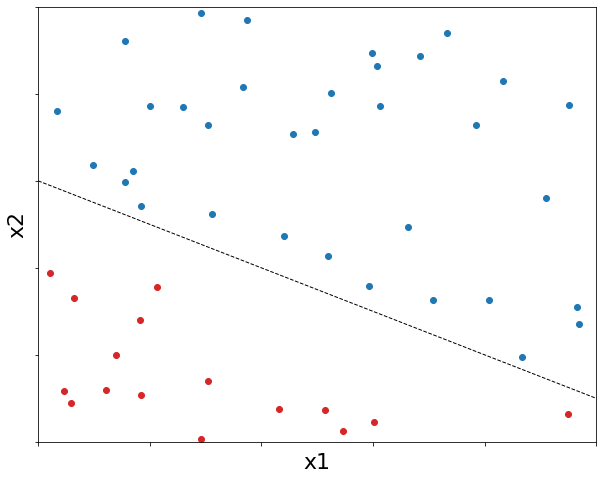

In [19]:
fig = plt.figure(figsize=(10, 8))  # cria uma nova figura com tamanho 10x8

# cria máscaras booleanas para separar os eventos com rótulo +1 (sinal) e -1 (fundo)
msk_sig = (df_train["y_label"] == +1)  # sinal (label +1)
msk_bkg = (df_train["y_label"] == -1)  # fundo (label -1)

# aplica as máscaras para obter dois DataFrames separados: sinal e fundo
df_train_sig = df_train[msk_sig]
df_train_bkg = df_train[msk_bkg]

# plota os pontos do sinal em azul
plt.plot(df_train_sig["x1"], df_train_sig["x2"], 'o', color='tab:blue')

# plota os pontos do fundo em vermelho
plt.plot(df_train_bkg["x1"], df_train_bkg["x2"], 'o', color='tab:red')

# plota a reta separadora x2 = p0 + p1 * x1 como uma linha tracejada preta
plt.plot([x1_min, x1_max],
         [p0 + p1 * x1_min, p0 + p1 * x1_max],
         linestyle='dashed', linewidth=1, color='black')

# define os limites dos eixos
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)

# rótulos dos eixos
plt.xlabel(r'x1')
plt.ylabel(r'x2')

# remove os números dos ticks dos eixos x e y (somente visual)
plt.gca().xaxis.set_ticklabels([])
plt.gca().yaxis.set_ticklabels([])

In [20]:
from sklearn import linear_model  # importa o módulo de modelos lineares do scikit-learn

# cria um objeto do modelo de regressão linear
linear_reg = linear_model.LinearRegression()

# treina (ajusta) o modelo aos dados: features ["x1", "x2"] e alvo "y_label"
linear_reg.fit(df_train[["x1", "x2"]], df_train["y_label"])

# imprime os coeficientes (pesos) aprendidos para x1 e x2
print(linear_reg.coef_)  # array com dois valores correspondentes aos pesos de x1 e x2

# imprime o intercepto (termo constante b da equação: y = w1*x1 + w2*x2 + b)
print(linear_reg.intercept_)

[0.21043994 0.46401667]
-1.2563373930328883


In [21]:
df_train[ "y_predict" ] = pd.Series( ( linear_reg.predict( df_train[ [ "x1", "x2" ] ] ) >= 0. ) ).map( { True: +1, False: -1} )
df_train

,x1,x2,y_label,y_predict
0,1.872701,4.847923,1,1
1,4.753572,3.875664,1,1
2,3.659970,4.697495,1,1
3,2.993292,4.474137,1,1
4,0.780093,2.989500,1,1
5,0.779973,4.609371,1,1
6,0.290418,0.442463,-1,-1
7,4.330881,0.979914,1,1
8,3.005575,0.226136,-1,-1
9,3.540363,1.626652,1,1


In [22]:
# calcula o erro de treinamento como a fração de exemplos mal classificados
# compara os rótulos verdadeiros (y_label) com as previsões (y_predict)
error_train = np.sum(df_train["y_label"] != df_train["y_predict"]) / df_train.shape[0]

# imprime o erro de treinamento (número entre 0 e 1, representando a proporção de erros)
print(error_train)

0.0


/cvmfs/sft.cern.ch/lcg/views/LCG_107_swan/x86_64-el9-gcc13-opt/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


[Text(0, 0.0, ''),
 Text(0, 1.0, ''),
 Text(0, 2.0, ''),
 Text(0, 3.0, ''),
 Text(0, 4.0, ''),
 Text(0, 5.0, '')]

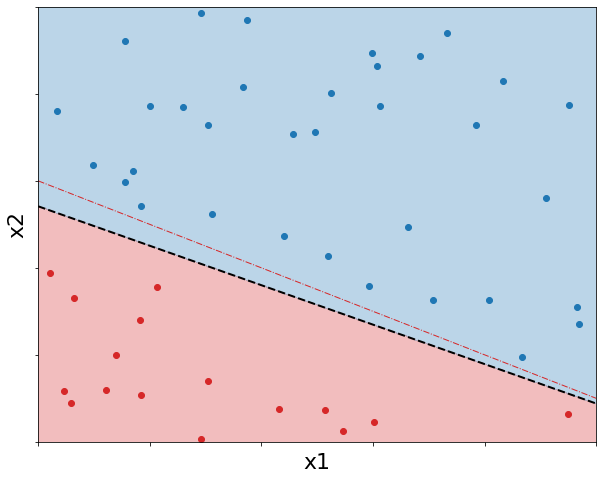

In [23]:
fig = plt.figure(figsize=(10, 8))  # cria uma figura com tamanho 10x8 polegadas

# número de pontos para construir a malha bidimensional (grade)
n_points_ = 500

# cria arrays com valores uniformemente espaçados para x1 e x2
data_x1_ = np.linspace(x1_min, x1_max, n_points_)[:, np.newaxis]  # reshape para coluna
data_x2_ = np.linspace(x2_min, x2_max, n_points_)[:, np.newaxis]

# cria a grade de pontos (malha 2D) com combinações entre x1 e x2
grid_x1_, grid_x2_ = np.meshgrid(data_x1_, data_x2_)

# combina x1 e x2 em pares coordenados para passar ao modelo
datascan_ = np.c_[grid_x1_.ravel(), grid_x2_.ravel()]

# usa o modelo para prever os rótulos em cada ponto da malha e remodela para o formato da grade
datascan_predict_ = (linear_reg.predict(datascan_).reshape(grid_x1_.shape) >= 0.)

# define um colormap com vermelho para -1 e azul para +1
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['tab:red', 'tab:blue'])

# plota a região de decisão como preenchimento de contorno com transparência
plt.contourf(grid_x1_, grid_x2_, datascan_predict_, cmap=custom_cmap, alpha=0.30)

# máscaras para separar os dados de treino preditos como sinal (+1) e fundo (-1)
msk_sig = (df_train["y_predict"] == +1)
msk_bkg = (df_train["y_predict"] == -1)

# separa os dados de treino com base nas previsões
df_train_sig = df_train[msk_sig]
df_train_bkg = df_train[msk_bkg]

# plota os pontos preditos como sinal em azul e fundo em vermelho
plt.plot(df_train_sig["x1"], df_train_sig["x2"], 'o', color='tab:blue')
plt.plot(df_train_bkg["x1"], df_train_bkg["x2"], 'o', color='tab:red')

# define uma função para traçar a fronteira de decisão do modelo aprendido
f_ = lambda x_: -(linear_reg.intercept_ + linear_reg.coef_[0] * x_) / linear_reg.coef_[1]

# plota a linha verdadeira usada para gerar os dados (vermelha, traço-ponto)
plt.plot(
    [x1_min, x1_max],
    [p0 + p1 * x1_min, p0 + p1 * x1_max],
    linestyle='dashdot', linewidth=1, color='tab:red'
)

# plota a fronteira de decisão aprendida (linha preta tracejada)
plt.plot(
    [x1_min, x1_max],
    [f_(x1_min), f_(x1_max)],
    linestyle='dashed', linewidth=2, color='black'
)

# define limites e rótulos dos eixos
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.xlabel(r'x1')
plt.ylabel(r'x2')

# remove os números dos ticks dos eixos para estética
plt.gca().xaxis.set_ticklabels([])
plt.gca().yaxis.set_ticklabels([])

In [24]:
np.random.seed(100)  # define a semente para o gerador de números aleatórios para reprodutibilidade dos dados de teste

# gera um novo conjunto de dados de teste com a mesma função de separação linear (mesma reta) usada para os dados de treino
X_test, y_test = create_dataset(n_data, p0, p1)

# cria um DataFrame com as colunas x1, x2 e os rótulos y_label
df_test = pd.DataFrame(
    np.c_[X_test, y_test],  # concatena horizontalmente os dados e os rótulos
    columns=("x1", "x2", "y_label")  # define os nomes das colunas
).astype({"y_label": "int32"})  # garante que os rótulos sejam inteiros

[Text(0, 0.0, ''),
 Text(0, 1.0, ''),
 Text(0, 2.0, ''),
 Text(0, 3.0, ''),
 Text(0, 4.0, ''),
 Text(0, 5.0, '')]

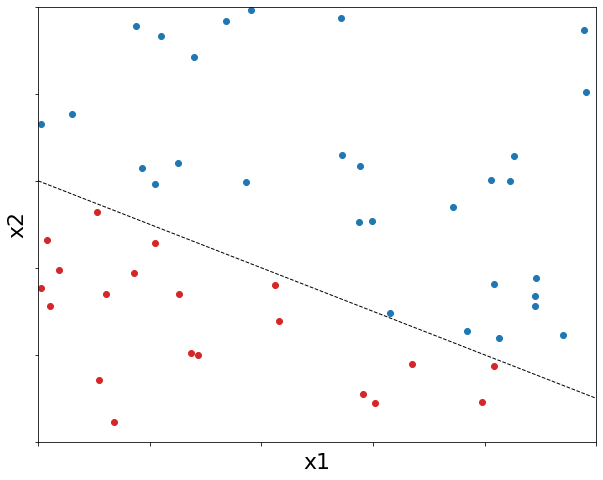

In [25]:
fig = plt.figure( figsize=(10,8) )  # cria uma nova figura com tamanho 10x8 polegadas

# máscaras booleanas para separar os pontos com rótulo +1 (sinal) e -1 (fundo)
msk_sig = ( df_test[ "y_label" ] == +1 )
msk_bkg = ( df_test[ "y_label" ] == -1 )

# separa os dados com base nas máscaras
df_test_sig = df_test[ msk_sig ]  # pontos classificados como sinal (+1)
df_test_bkg = df_test[ msk_bkg ]  # pontos classificados como fundo (-1)

# plota os pontos do sinal em azul
plt.plot( df_test_sig[ "x1" ], df_test_sig[ "x2" ], 'o', color='tab:blue' )

# plota os pontos do fundo em vermelho
plt.plot( df_test_bkg[ "x1" ], df_test_bkg[ "x2" ], 'o', color='tab:red' )

# plota a reta de separação original usada para gerar os dados (reta de verdade)
plt.plot(
    [ x1_min, x1_max ],
    [ ( p0 + p1 * x1_min ), ( p0 + p1 * x1_max ) ],
    linestyle='dashed', linewidth=1, color='black'
)

# define os limites do gráfico nos eixos x e y
plt.xlim( x1_min, x1_max )
plt.ylim( x2_min, x2_max )

# adiciona rótulos nos eixos
plt.xlabel( r'x1' )
plt.ylabel( r'x2' )

# remove os valores dos ticks nos eixos para deixar o gráfico mais limpo
plt.gca().xaxis.set_ticklabels( [] )
plt.gca().yaxis.set_ticklabels( [] )

In [26]:
# aplica o modelo treinado (regressão linear) aos dados de teste
# a predição retorna valores reais; a condição >= 0 define a fronteira de decisão
# pontos com predição >= 0 são classificados como +1, e os demais como -1
df_test[ "y_predict" ] = pd.Series(
    ( linear_reg.predict( df_test[ [ "x1", "x2" ] ] ) >= 0. )
).map( { True: +1, False: -1 } )  # mapeia True → +1 e False → -1

# calcula o erro de classificação no conjunto de teste
# compara o rótulo verdadeiro com a predição, soma os erros e divide pelo total
error_test = np.sum( df_test[ "y_label" ] != df_test[ "y_predict" ] ) / df_test.shape[0]

# imprime a taxa de erro no teste
print( error_test )

0.08


[Text(0, 0.0, ''),
 Text(0, 1.0, ''),
 Text(0, 2.0, ''),
 Text(0, 3.0, ''),
 Text(0, 4.0, ''),
 Text(0, 5.0, '')]

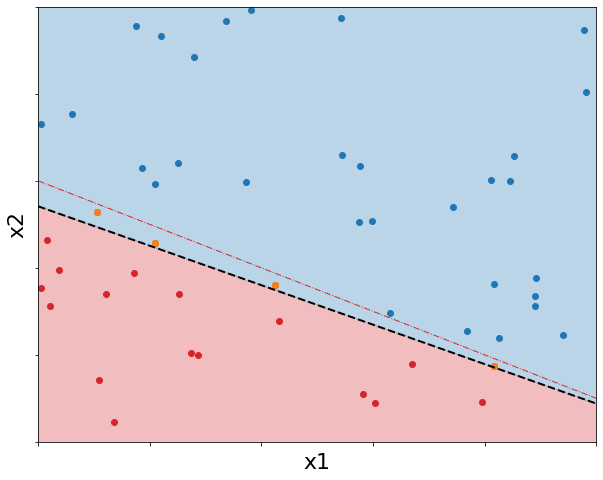

In [14]:
fig = plt.figure( figsize=(10,8) )

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap( ['tab:red','tab:blue'] )
plt.contourf( grid_x1_, grid_x2_, datascan_predict_, cmap=custom_cmap, alpha=0.30 )

msk_sig = ( df_test[ "y_predict" ] == +1 )
msk_bkg = ( df_test[ "y_predict" ] == -1 )
msk_error = ( df_test[ "y_label" ] != df_test[ "y_predict" ] )
df_test_sig = df_test[ msk_sig ]
df_test_bkg = df_test[ msk_bkg ]
df_test_error = df_test[ msk_error ]
plt.plot( df_test_sig[ "x1" ], df_test_sig[ "x2" ], 'o', color='tab:blue' )
plt.plot( df_test_bkg[ "x1" ], df_test_bkg[ "x2" ], 'o', color='tab:red' )
plt.plot( df_test_error[ "x1" ], df_test_error[ "x2" ], 'o', color='tab:orange' )
plt.plot( [ x1_min, x1_max ], [ ( p0 + p1 * x1_min ), ( p0 + p1 * x1_max ) ], linestyle='dashdot', linewidth=1, color='tab:red' )
plt.plot( [ x1_min, x1_max ], [ f_( x1_min ), f_( x1_max ) ], linestyle='dashed', linewidth=2, color='black' )

plt.xlim( x1_min, x1_max )
plt.ylim( x2_min, x2_max )
plt.xlabel( r'x1' )
plt.ylabel( r'x2' )
plt.gca().xaxis.set_ticklabels( [] )
plt.gca().yaxis.set_ticklabels( [] )

[Text(0, 0.0, ''),
 Text(0, 1.0, ''),
 Text(0, 2.0, ''),
 Text(0, 3.0, ''),
 Text(0, 4.0, ''),
 Text(0, 5.0, '')]

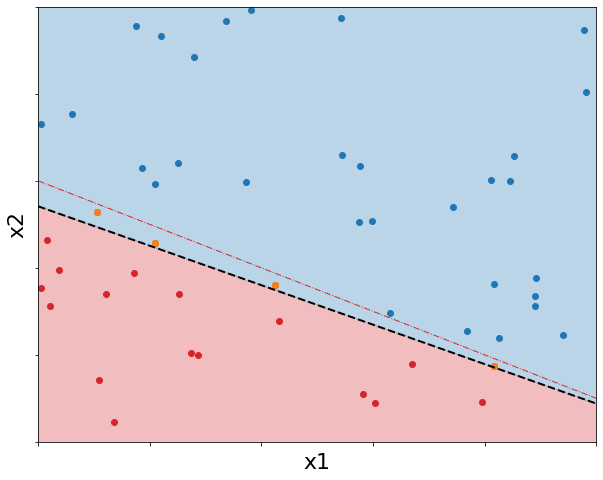

In [27]:
# cria uma nova figura para o gráfico
fig = plt.figure( figsize=(10,8) )

# cria um colormap personalizado para as regiões do gráfico: vermelho para fundo (-1), azul para sinal (+1)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap( ['tab:red','tab:blue'] )

# desenha a região de decisão do modelo usando contornos preenchidos
# o grid de predições (datascan_predict_) é desenhado com o colormap definido anteriormente
plt.contourf( grid_x1_, grid_x2_, datascan_predict_, cmap=custom_cmap, alpha=0.30 )

# define as máscaras para pontos classificados como sinal (+1) e fundo (-1)
# também cria uma máscara para os pontos classificados incorretamente (erro)
msk_sig = ( df_test[ "y_predict" ] == +1 )  # pontos classificados como sinal
msk_bkg = ( df_test[ "y_predict" ] == -1 )  # pontos classificados como fundo
msk_error = ( df_test[ "y_label" ] != df_test[ "y_predict" ] )  # pontos com erro na classificação

# separa os dados de teste com base nas máscaras
df_test_sig = df_test[ msk_sig ]  # pontos classificados como sinal
df_test_bkg = df_test[ msk_bkg ]  # pontos classificados como fundo
df_test_error = df_test[ msk_error ]  # pontos com erro de classificação

# plota os pontos classificados corretamente como sinal em azul
plt.plot( df_test_sig[ "x1" ], df_test_sig[ "x2" ], 'o', color='tab:blue' )

# plota os pontos classificados corretamente como fundo em vermelho
plt.plot( df_test_bkg[ "x1" ], df_test_bkg[ "x2" ], 'o', color='tab:red' )

# plota os pontos classificados incorretamente em laranja
plt.plot( df_test_error[ "x1" ], df_test_error[ "x2" ], 'o', color='tab:orange' )

# plota a reta de separação original (linha de verdade)
plt.plot(
    [ x1_min, x1_max ],
    [ ( p0 + p1 * x1_min ), ( p0 + p1 * x1_max ) ],
    linestyle='dashdot', linewidth=1, color='tab:red'
)

# plota a reta de separação predita pelo modelo treinado
# a função f_ define a reta com base nos coeficientes da regressão linear
plt.plot(
    [ x1_min, x1_max ],
    [ f_( x1_min ), f_( x1_max ) ],
    linestyle='dashed', linewidth=2, color='black'
)

# define os limites do gráfico nos eixos x e y
plt.xlim( x1_min, x1_max )
plt.ylim( x2_min, x2_max )

# adiciona rótulos aos eixos
plt.xlabel( r'x1' )
plt.ylabel( r'x2' )

# remove os valores dos ticks nos eixos para um visual mais limpo
plt.gca().xaxis.set_ticklabels( [] )
plt.gca().yaxis.set_ticklabels( [] )

## Exercicio 

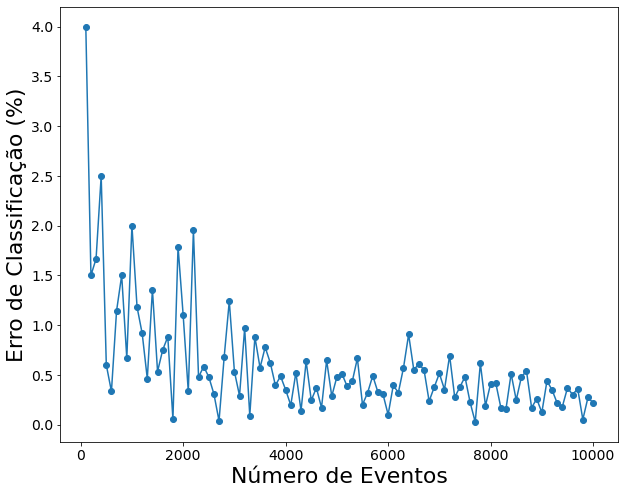

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

errors = []

for Nevents in range(100, 10001, 100):  
    X_train, y_train = create_dataset(Nevents, p0, p1)  
    df_train = pd.DataFrame(np.c_[X_train, y_train], columns=("x1", "x2", "y_label")).astype({"y_label": "int32"})
    
    linear_reg = linear_model.LinearRegression()
    linear_reg.fit(df_train[["x1", "x2"]], df_train["y_label"])
    df_train["y_predict"] = pd.Series((linear_reg.predict(df_train[["x1", "x2"]]) >= 0.)).map({True: +1, False: -1})
    
    error = np.sum(df_train["y_label"] != df_train["y_predict"]) / df_train.shape[0]
    errors.append(error)  

plt.figure(figsize=(10, 8))
plt.plot(range(100, 10001, 100), np.array(errors) * 100, marker='o', color='tab:blue')  # % erro
plt.xlabel('Número de Eventos')
plt.ylabel('Erro de Classificação (%)')
plt.title('')
plt.show()